# NanoAODplus_analyzer

In [1]:
import time

from coffea import hist
from coffea.analysis_objects import JaggedCandidateArray
import coffea.processor as processor
from awkward import JaggedArray
import numpy as np
from pprint import pprint

from nanoAODplus_processor.EventSelectorProcessor import EventSelectorProcessor

from data.fileset import filesets
import yaml

import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

In [2]:
tstart = time.time()

files = {'MuOnia2017MINIAOD': filesets['MuOnia2017MINIAOD'][0:3]}

output = processor.run_uproot_job(files,
                                  treename='Events',
                                  processor_instance=EventSelectorProcessor(name="dimu"),
                                  #executor=processor.iterative_executor,
                                  #executor_args={'flatten': True},
                                  executor=processor.futures_executor,
                                  #executor_args={'workers': 6, 'flatten': True},
                                  executor_args={'workers': 8, 'flatten': True},
                                  chunksize=100000,
                                 )

elapsed = time.time() - tstart
print(output)

TypeError: __init__() missing 1 required positional argument: 'analyzer_name'

AssertionError: len along main axis of h has to be smaller by 1 than len of bins

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


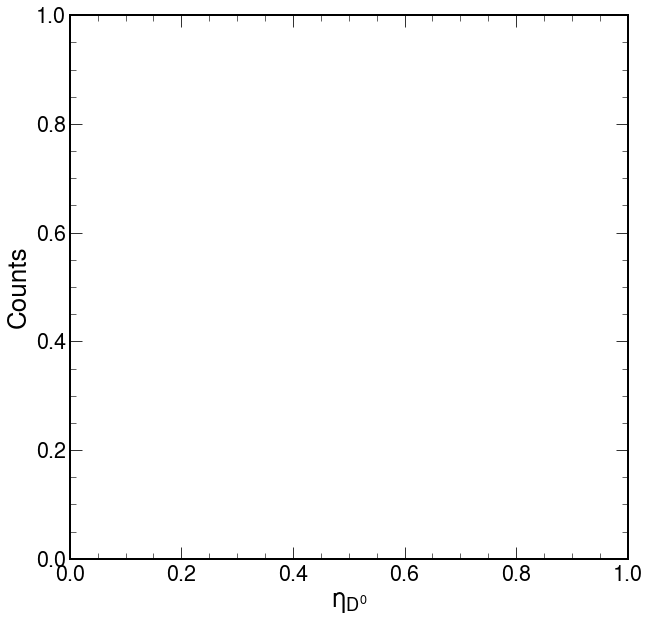

In [12]:
ax = hist.plot1d(output['Dplus_rec_eta'], overlay='dataset')
ax.set_xlim(0, 20)

In [ ]:
ax = hist.plot1d(output['D0_rec_pt'], overlay='dataset')
ax.set_xlim(0, 20)


(0.0, 20.0)

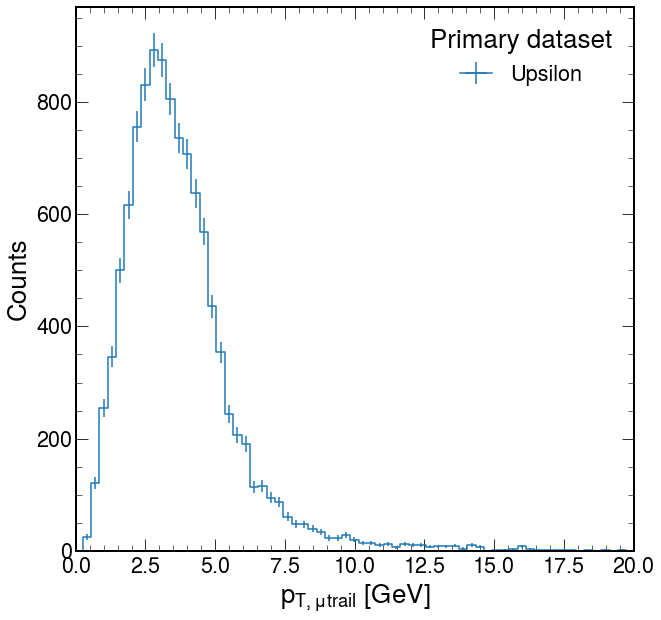

In [6]:
hista = output['Muon_trail_pt']
ax = hist.plot1d(hista, overlay='dataset')
ax.set_xlim(0,20)

(0.0, 30.0)

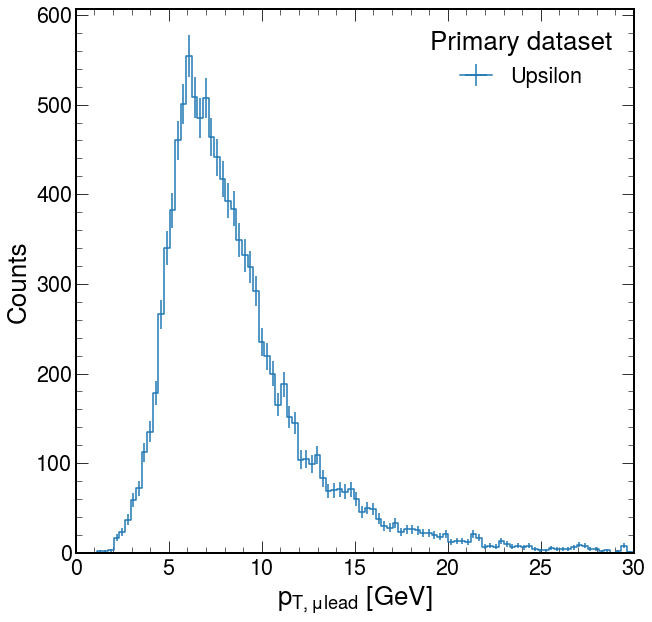

In [9]:
histi = output['Muon_lead_pt']
ax = hist.plot1d(histi, overlay='dataset')
ax.set_xlim(0,30)

In [ ]:
ax = hist.plot1d(output['Muon_eta'], overlay='dataset')

In [ ]:
ax = hist.plot1d(output['Muon_phi'], overlay='dataset')

In [ ]:
ax = hist.plot1d(output['Dimuon_mass'], overlay='dataset')
ax.set_xlim(9,9.7)
ax.set_ylim(0,1000)

(0.0, 30.0)

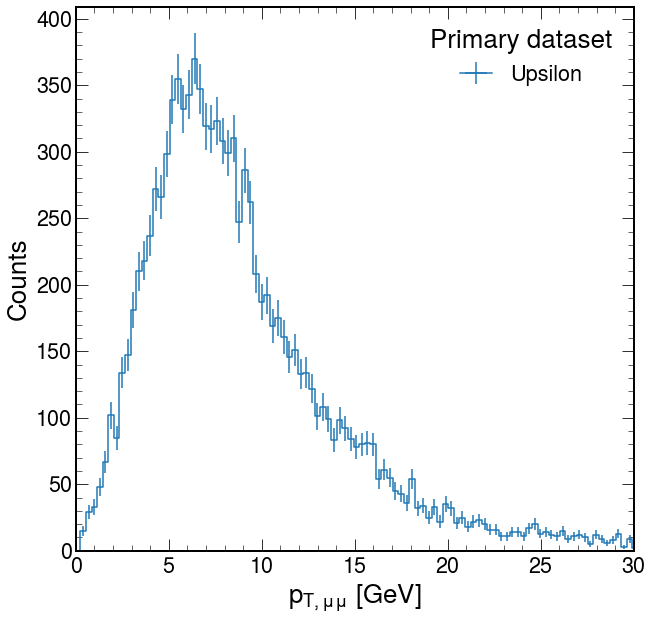

In [5]:
histo = output['Dimuon_pt']
ax = hist.plot1d(histo, overlay='dataset')
ax.set_xlim(0,30)

In [ ]:
ax= hist.plot1d(output['Dimuon_eta'], overlay='dataset')

In [ ]:
ax= hist.plot1d(output['Dimuon_phi'], overlay='dataset')

In [ ]:
ax= hist.plot1d(output['D0_mass'], overlay='dataset')
ax.set_xlim(1.0,2.5)

In [ ]:
ax= hist.plot1d(output['D0_pt'], overlay='dataset')
ax.set_xlim(0,7.5)

In [ ]:
ax= hist.plot1d(output['D0_eta'], overlay='dataset')

In [ ]:
ax= hist.plot1d(output['D0_phi'], overlay='dataset')

Object ` output['D0_phi'].rebin` not found.
